In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import beta


# First taste of posterior probabilities

## Context:
Imagine a 4 sided globe where you toss and try to figure out what proportion of the globe is made of water (p). W is the number of Water observations, and L is the number of Land observations.

In [3]:
sample = [
    "W",
    "L",
    "W",
    "W",
    "W",
    "L",
    "W",
    "L",
    "W"
]

In [4]:
len(sample)

9

In [5]:
sum_w = len(list(filter(lambda x: x == "W", sample)))
sum_w

6

In [6]:
sum_l = len(list(filter(lambda x: x == "L", sample)))
sum_l

3

In [7]:
p_list = [0, 0.25, 0.5, 0.75, 1]

In [8]:
def basic_nominal_posterior(sample:list, p:float, w:int, l:int):
    """
    Posterior distribution for the Garden of forks problem

    p is the proportion of water on the 4 sided globe
    w is the number of water observations
    l is the number of land observations
    
    """
    return ((4 * p) ** w) * ((4- 4 * p) ** l)

In [9]:
posterior_out = {}

for p in p_list:
    posterior = basic_nominal_posterior(sample, p, sum_w, sum_l)
    posterior_out[p] = posterior




In [10]:
posterior_out

{0: 0, 0.25: 27.0, 0.5: 512.0, 0.75: 729.0, 1: 0}

In [11]:
729/1268

0.5749211356466877

In [12]:
# Convert number of possible outcomes to probabilities
total_num_outcomes = sum(posterior_out.values())
for p, v in posterior_out.items():
    posterior_out[p] = v / total_num_outcomes


In [13]:
posterior_out.values()

dict_values([0.0, 0.021293375394321766, 0.4037854889589905, 0.5749211356466877, 0.0])

In [14]:
sum(posterior_out.values())

1.0

Text(0, 0.5, 'Posterior Probabilities')

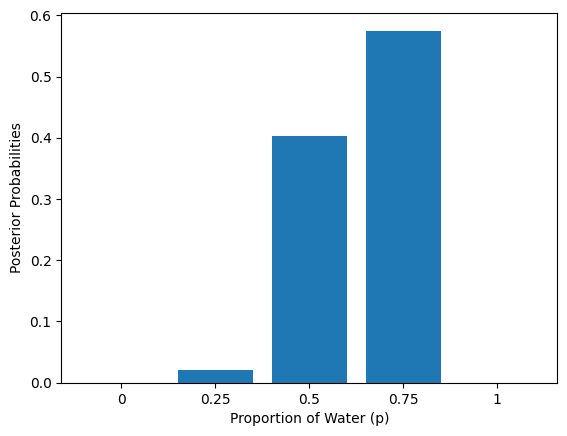

In [15]:
plt.bar(range(len(posterior_out)), posterior_out.values(), align='center')
plt.xticks(range(len(posterior_out)), posterior_out.keys())
plt.xlabel("Proportion of Water (p)")
plt.ylabel("Posterior Probabilities")

In [16]:
# Validate that sum of all posterior probabilities is 1

sum(posterior_out.values())

1.0

# Implement Generative Model

In [17]:
def globe_sampling(p, N=10):
    """
    Simulate N tosses of the 4 sided globe
    """
    return np.random.choice(a = ["W", "L"], size=int(N), p=[p, 1-p])


In [18]:
globe_sampling(0.5, 10)

array(['L', 'L', 'W', 'W', 'L', 'W', 'W', 'L', 'L', 'L'], dtype='<U1')

## How to test generative model?

### Test extreme settings (p=1, p=0)

In [19]:
# Test p=0
globe_sampling(0, 10)

array(['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L'], dtype='<U1')

In [20]:

globe_sampling(1, 10)

array(['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'], dtype='<U1')

## Test that large samples converge to the p value

In [21]:
len(list(filter(lambda x: x == "W", sample)))

6

In [22]:
len(list(filter(lambda x: x == "W",globe_sampling(p=0.5, N=1e4)))) / 1e4

0.5036

# Sampling from the Posterior Distribution

## Why is the posterior distribution of infinite N experiments == Beta Distribution?

https://www.youtube.com/watch?v=juF3r12nM5A 

In [23]:
import seaborn as sns

# Detour: Demonstrating that as more samples are added with the same ratio of a:b, the Beta distribution narrows. 
This represents a decrease in uncertainty

(array([5.96653196, 5.96653196, 1.49163299, 0.        , 1.49163299]),
 array([0.60121439, 0.66825501, 0.73529563, 0.80233625, 0.86937687,
        0.93641749]),
 <BarContainer object of 5 artists>)

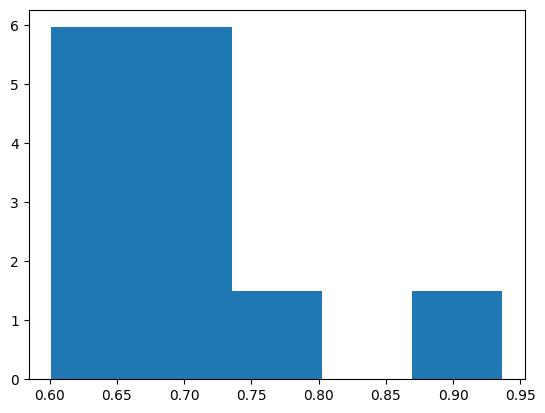

In [24]:
fig, ax = plt.subplots (1,1)

ax.hist(beta.rvs(a = 7+1, b = 3+1, size = 10), density = True, bins = "auto") # the underlying implication is that probability of a is always a/(a+b)

(array([0.74142474, 2.59498659, 3.7071237 , 6.30211029, 7.4142474 ,
        7.78495977, 5.56068555, 2.96569896]),
 array([0.57414544, 0.60112053, 0.62809562, 0.65507071, 0.6820458 ,
        0.70902089, 0.73599598, 0.76297107, 0.78994617]),
 <BarContainer object of 8 artists>)

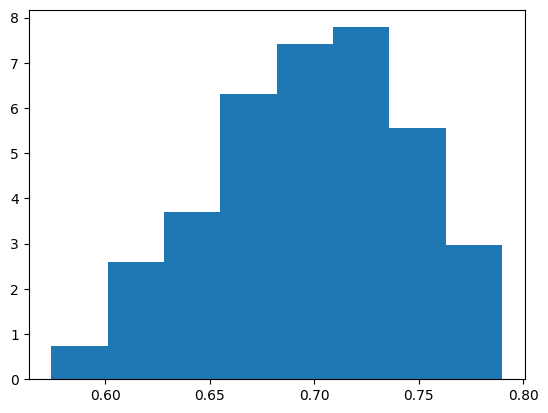

In [25]:
fig, ax = plt.subplots (1,1)

ax.hist(beta.rvs(a = 70+1, b = 30+1, size = 100), density = True, bins = "auto")


(array([ 0.25695788,  0.25695788,  0.25695788,  0.51391576,  1.02783152,
         1.02783152,  5.39611548,  4.88219972,  7.96569427, 12.07702035,
        18.24400947, 20.2996725 , 23.38316706, 30.06407194, 26.7236195 ,
        23.12620918, 23.38316706, 21.84141978, 13.61876763,  8.22265215,
         5.91003124,  4.11132608,  1.2847894 ,  1.54174728,  1.02783152,
         0.25695788,  0.25695788]),
 array([0.64438787, 0.64827956, 0.65217124, 0.65606293, 0.65995462,
        0.66384631, 0.667738  , 0.67162969, 0.67552137, 0.67941306,
        0.68330475, 0.68719644, 0.69108813, 0.69497982, 0.6988715 ,
        0.70276319, 0.70665488, 0.71054657, 0.71443826, 0.71832995,
        0.72222163, 0.72611332, 0.73000501, 0.7338967 , 0.73778839,
        0.74168008, 0.74557177, 0.74946345]),
 <BarContainer object of 27 artists>)

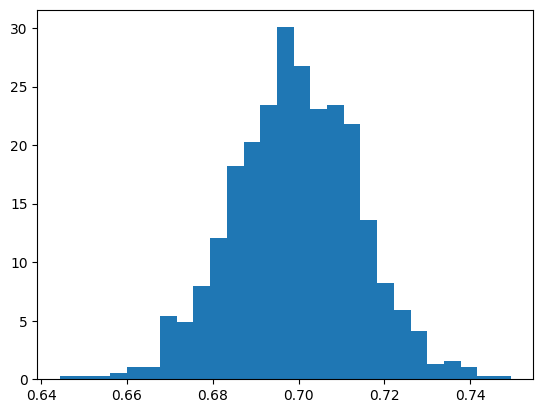

In [26]:
fig, ax = plt.subplots (1,1)

ax.hist(beta.rvs(a = 700+1, b = 300+1, size = 1000), density = True, bins = "auto")

(array([ 0.39386709,  0.19693354,  0.19693354,  0.39386709,  0.39386709,
         0.78773418,  2.36320253,  1.7724019 ,  2.95400316,  4.33253797,
         4.52947151,  9.8466772 , 11.81601264, 13.78534808, 20.67802212,
        24.02589237, 32.10016768, 33.28176894, 43.52231323, 51.20272144,
        51.0057879 , 55.73219296, 62.624867  , 59.67086384, 61.44326573,
        58.88312966, 56.91379422, 53.56592397, 50.61192081, 45.29471512,
        38.40204108, 28.94923097, 23.63202528, 20.67802212, 14.96694935,
        11.22521201,  9.64974366,  6.89267404,  4.33253797,  2.95400316,
         3.54480379,  1.37853481,  1.57546835,  0.98466772,  0.39386709,
         0.78773418]),
 array([0.67548002, 0.67649559, 0.67751116, 0.67852674, 0.67954231,
        0.68055788, 0.68157345, 0.68258902, 0.68360459, 0.68462016,
        0.68563573, 0.6866513 , 0.68766688, 0.68868245, 0.68969802,
        0.69071359, 0.69172916, 0.69274473, 0.6937603 , 0.69477587,
        0.69579144, 0.69680701, 0.69782259, 0.69

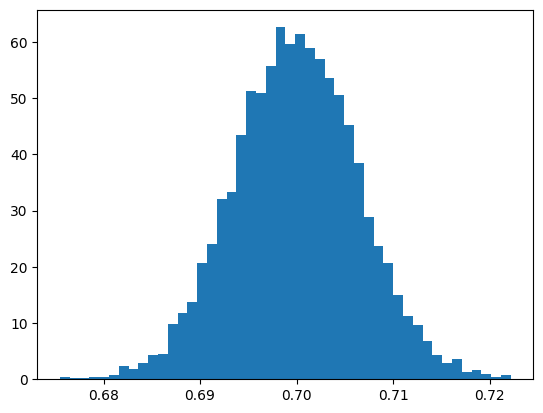

In [27]:
fig, ax = plt.subplots (1,1)

ax.hist(beta.rvs(a = 3500+1, b = 1500+1, size = 5000), density = True, bins = "auto")

## Detour: Thompson Sampling
https://www.youtube.com/watch?v=nkyDGGQ5h60

## Sampling from the beta distribution (posterior distribution)

In [28]:
from scipy.stats import beta

random_sample = beta.rvs(a = 6+1, b = 3+1, size = 1000)

# +1 is needed for a and b because the underlying formula uses (a-1) and (b-1)

In [29]:
random_sample

array([0.61583616, 0.32021746, 0.90955377, 0.60947344, 0.42406513,
       0.35478814, 0.78423333, 0.51819132, 0.50308636, 0.52524145,
       0.55577026, 0.68784775, 0.78692645, 0.78898247, 0.72868165,
       0.79934667, 0.80936788, 0.60849222, 0.64739351, 0.38370863,
       0.83909717, 0.8439954 , 0.46170659, 0.66004273, 0.64585023,
       0.74129011, 0.51804173, 0.76952883, 0.65840111, 0.44787209,
       0.32733009, 0.67489085, 0.94051448, 0.63101277, 0.5318171 ,
       0.56610635, 0.79638881, 0.7426948 , 0.47721941, 0.50680063,
       0.81025487, 0.77992023, 0.53470386, 0.18452525, 0.89867744,
       0.43516967, 0.78434858, 0.59207873, 0.66148799, 0.65419157,
       0.79815635, 0.57991582, 0.63309409, 0.53860924, 0.66350373,
       0.62868635, 0.35892769, 0.79857793, 0.64441915, 0.71924399,
       0.63296733, 0.55866493, 0.56346474, 0.75759232, 0.46570949,
       0.7044205 , 0.74824685, 0.86597391, 0.53261689, 0.88191683,
       0.68713629, 0.39380749, 0.66294812, 0.45650384, 0.79129

(array([0.07858271, 0.        , 0.05238847, 0.39291353, 0.62866164,
        0.73343858, 1.20493482, 1.72881952, 1.54545987, 2.4622581 ,
        2.12173304, 2.61942351, 2.48845234, 2.80278316, 2.25270422,
        2.17412152, 1.17874058, 1.02157517, 0.49769047, 0.20955388]),
 array([0.18752405, 0.22570039, 0.26387673, 0.30205307, 0.34022941,
        0.37840575, 0.41658209, 0.45475843, 0.49293477, 0.5311111 ,
        0.56928744, 0.60746378, 0.64564012, 0.68381646, 0.7219928 ,
        0.76016914, 0.79834548, 0.83652182, 0.87469816, 0.91287449,
        0.95105083]),
 <BarContainer object of 20 artists>)

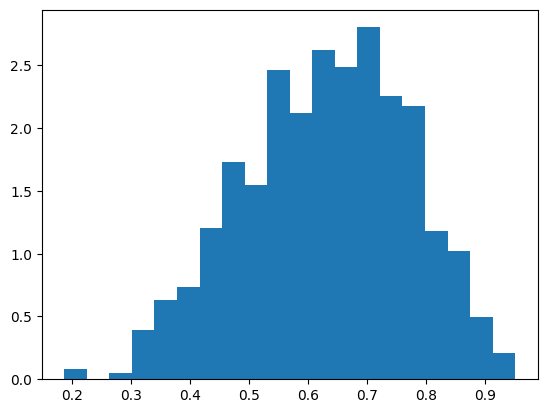

In [30]:
fig, ax = plt.subplots (1,1)

ax.hist(beta.rvs(a = 6+1, b = 3+1, size = 1000), density = True, bins = "auto")

## Deriving the Posterior Predictive Distribution

### First round of sampling: Predictive Distribution for p (assuming 9 tosses per experiment)

In [31]:
random_sample

array([0.61583616, 0.32021746, 0.90955377, 0.60947344, 0.42406513,
       0.35478814, 0.78423333, 0.51819132, 0.50308636, 0.52524145,
       0.55577026, 0.68784775, 0.78692645, 0.78898247, 0.72868165,
       0.79934667, 0.80936788, 0.60849222, 0.64739351, 0.38370863,
       0.83909717, 0.8439954 , 0.46170659, 0.66004273, 0.64585023,
       0.74129011, 0.51804173, 0.76952883, 0.65840111, 0.44787209,
       0.32733009, 0.67489085, 0.94051448, 0.63101277, 0.5318171 ,
       0.56610635, 0.79638881, 0.7426948 , 0.47721941, 0.50680063,
       0.81025487, 0.77992023, 0.53470386, 0.18452525, 0.89867744,
       0.43516967, 0.78434858, 0.59207873, 0.66148799, 0.65419157,
       0.79815635, 0.57991582, 0.63309409, 0.53860924, 0.66350373,
       0.62868635, 0.35892769, 0.79857793, 0.64441915, 0.71924399,
       0.63296733, 0.55866493, 0.56346474, 0.75759232, 0.46570949,
       0.7044205 , 0.74824685, 0.86597391, 0.53261689, 0.88191683,
       0.68713629, 0.39380749, 0.66294812, 0.45650384, 0.79129

In [33]:
experiment_res = []
for p in random_sample:
    sampling_experiments = globe_sampling(p, N = 10)
    experiment_res.append(sampling_experiments)

In [36]:
experiment_res

[array(['W', 'W', 'W', 'W', 'W', 'W', 'L', 'L', 'W', 'L'], dtype='<U1'),
 array(['W', 'L', 'W', 'L', 'L', 'L', 'L', 'L', 'W', 'L'], dtype='<U1'),
 array(['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'], dtype='<U1'),
 array(['W', 'L', 'L', 'W', 'W', 'W', 'L', 'L', 'W', 'L'], dtype='<U1'),
 array(['L', 'W', 'W', 'L', 'L', 'L', 'L', 'L', 'L', 'L'], dtype='<U1'),
 array(['W', 'L', 'L', 'L', 'W', 'L', 'L', 'W', 'W', 'W'], dtype='<U1'),
 array(['L', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'], dtype='<U1'),
 array(['W', 'W', 'L', 'W', 'W', 'L', 'L', 'L', 'L', 'W'], dtype='<U1'),
 array(['W', 'W', 'L', 'W', 'W', 'L', 'W', 'W', 'W', 'L'], dtype='<U1'),
 array(['L', 'W', 'W', 'W', 'L', 'W', 'W', 'W', 'W', 'W'], dtype='<U1'),
 array(['L', 'L', 'W', 'L', 'L', 'W', 'W', 'L', 'L', 'W'], dtype='<U1'),
 array(['L', 'W', 'L', 'W', 'W', 'W', 'L', 'W', 'W', 'W'], dtype='<U1'),
 array(['W', 'W', 'L', 'W', 'W', 'L', 'L', 'W', 'W', 'W'], dtype='<U1'),
 array(['W', 'L', 'W', 'W', 'W', 'L', 'L', 'W', 'W'

In [35]:
len(experiment_res)

1000

In [ ]:
# Visualize first 10 experiments
fig, ax = plt.subplots(1,1)

experiment_res[0:10]

In [ ]:
# Sample from all experiment outcomes?

# posterior_predictive_distribution = 

In [ ]:
fig, ax = plt.subplots(1,1)

# sample from 

### Second round of sampling: Posterior Distribution for all experiments run in the first round